The "Credit Score" problem solved with Random Forest Classifier

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

Importing the dataset

In [16]:
arquivo = 'C:/Users/silas/Downloads/cs-training.csv'
df = pd.read_csv(arquivo, index_col=0)

Checking the dataset

In [17]:
df.shape

(150000, 11)

In [18]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Univariate analysis

<AxesSubplot:>

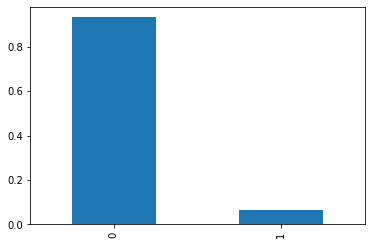

In [20]:
df['SeriousDlqin2yrs'].value_counts(normalize=True).plot.bar()

In [21]:
pd.DataFrame({'Contagens':df['SeriousDlqin2yrs'].value_counts(),
              'pct':df['SeriousDlqin2yrs'].value_counts(normalize=True)},
              index=df['SeriousDlqin2yrs'].value_counts().index,
              ).style.format(precision=2, decimal=',', thousands='.',
                             formatter={'pct':'{:.1%}'})

,Contagens,pct
0,139.974,"93,3%"
1,10.026,"6,7%"


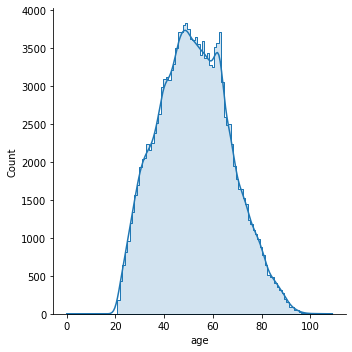

In [22]:
variavel = 'age'
sns.displot(df,
            x=variavel,
            bins=110,
            alpha=.2,
            kde=True,
            element='step')
plt.show()

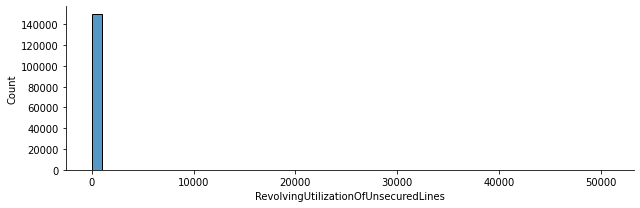

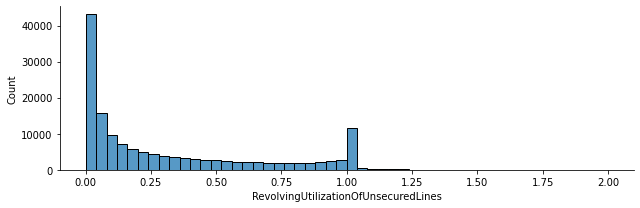

In [23]:
variavel='RevolvingUtilizationOfUnsecuredLines'
sns.displot(df,
            x=variavel,
            bins=50,
            aspect=3,
            height=3)
sns.displot(df[df['RevolvingUtilizationOfUnsecuredLines']<2],
            x=variavel,
            bins=50,
            aspect=3,
            height=3)
plt.show()

In [24]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Cleaning the Dataset

In [25]:
# count the duplicated rows by each column
df.duplicated().sum()

609

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

Handle with missing values inside a Random Forest algorithm

In [28]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(-10000)
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(-1)

In [29]:
pd.DataFrame(df.isna().sum())

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Bivariate Analysis

Text(0, 0.5, 'Bad Rate em 2 anos')

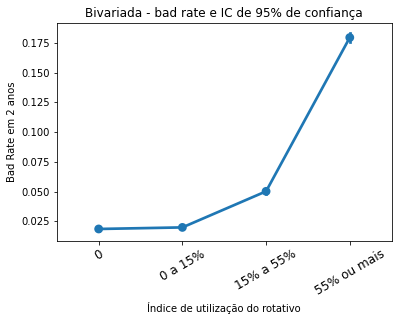

In [30]:
var= 'RevolvingUtilizationOfUnsecuredLines'
num_cat=4
var_resp= 'SeriousDlqin2yrs'

cat_srs, bins = pd.qcut(df[var], num_cat, retbins=True, duplicates='drop')

ax= sns.pointplot(x=cat_srs, y=var_resp, data=df)

labels =['0', '0 a 15%', '15% a 55%', '55% ou mais']
ax.set_xticklabels(labels, rotation=30, fontsize='large')
ax.set_title('Bivariada - bad rate e IC de 95% de confiança')
ax.set_xlabel('Índice de utilização do rotativo')
ax.set_ylabel('Bad Rate em 2 anos')



Starting the Random Forest Classifier Algorithm

In [31]:
X = df.drop(columns=['SeriousDlqin2yrs'], axis=1).copy()
y = df['SeriousDlqin2yrs'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
132375,0.110272,64,0,0.054977,2400.0,2,0,0,0,1.0
127265,0.000000,56,0,598.000000,-10000.0,3,0,1,0,0.0
128386,0.732919,60,0,4584.000000,-10000.0,9,0,1,0,1.0
41744,0.721948,33,0,0.500648,5400.0,8,0,0,0,0.0
148815,0.847395,60,3,0.536957,6033.0,12,1,1,0,0.0


In [33]:
clf = RandomForestClassifier(n_estimators=5,
                             ccp_alpha= .005,
                             class_weight="balanced")

clf.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.005, class_weight='balanced', n_estimators=5)

Variable Importance

<AxesSubplot:>

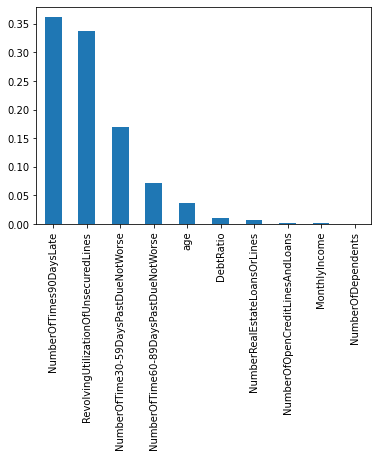

In [34]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot.bar()

In [42]:

y_prob = clf.predict_proba(X_test)

Performance Metrics

In [49]:


auc = roc_auc_score(y_test, y_prob[:, 1])
print(f'AUC Test : {auc:.2f}')



AUC Test : 0.84


c:\Users\silas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


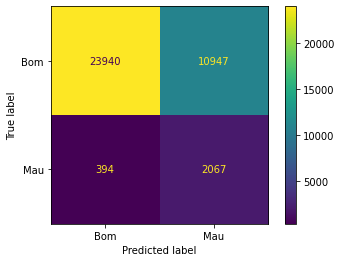

In [57]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Bom', 'Mau'])